In [1]:
# Imports
import os
import math

import re
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime as dt
from scipy.spatial.transform import Rotation as R
from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
# Setup
% matplotlib inline
tqdm.pandas()

D:\Users\liong\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
# Get directory
def get_dir(add, show=True):
    """
    Get contents of directory
    
    Param: 
        add: str: address
        show: boolean: if True, prints contents with indexing
    Return:
        result: str[]: directory contents
    """
    result = os.listdir(add)
    
    # Print
    if show: 
        for ix, v in enumerate(result):
            print(str(ix) + ': ' + v)
        
    return result

address = '\\'.join(os.getcwd().split(
    '\\')[:-3]) + '\\Testground' + '\\Test 3 - Chin Yang Playground' + '\\PD_redo' + '\\'

directory = get_dir(address)

0: xacc-pure-8g-500_Metawear_2020-01-30T22.42.27.635_C5013CAC38C1_Accelerometer_1.5.0.csv
1: xacc-pure-8g-500_Metawear_2020-01-30T22.42.27.635_C5013CAC38C1_Gyroscope_1.5.0.csv
2: xcomb-8g-500_Metawear_2020-01-30T22.46.34.738_C5013CAC38C1_Accelerometer_1.5.0.csv
3: xcomb-8g-500_Metawear_2020-01-30T22.46.34.738_C5013CAC38C1_Gyroscope_1.5.0.csv
4: xgyro-pure-8g-500_Metawear_2020-01-30T22.44.45.632_C5013CAC38C1_Accelerometer_1.5.0.csv
5: xgyro-pure-8g-500_Metawear_2020-01-30T22.44.45.632_C5013CAC38C1_Gyroscope_1.5.0.csv
6: xtoy-8g-500_Metawear_2020-01-30T23.47.49.724_C5013CAC38C1_Accelerometer_1.5.0.csv
7: xtoy-8g-500_Metawear_2020-01-30T23.47.49.724_C5013CAC38C1_Gyroscope_1.5.0.csv
8: yacc-pure-8g-500_Metawear_2020-01-30T23.07.04.787_C5013CAC38C1_Accelerometer_1.5.0.csv
9: yacc-pure-8g-500_Metawear_2020-01-30T23.07.04.787_C5013CAC38C1_Gyroscope_1.5.0.csv
10: ycomb-8g-500_Metawear_2020-01-30T23.17.22.909_C5013CAC38C1_Accelerometer_1.5.0.csv
11: ycomb-8g-500_Metawear_2020-01-30T23.17.22.909

In [4]:
# Load data
index = 14

assert index >= 0
assert index % 2 == 0
assert index + 1 < len(directory)

In [5]:
# Accelerometer and gyroscope loading
d = {}

for i in [('a', 0), ('g', 1)]:
    # Name
    d[i[0]] = {'name': directory[index + i[1]]}
    
    # Address
    d[i[0]]['add'] = address + d[i[0]]['name']
    
    # Dataframe
    d[i[0]]['df'] = pd.read_csv(d[i[0]]['add'])
    
    # Rename columns
    d[i[0]]['df'] = d[i[0]]['df'].rename(
    {
        k: k.replace('-', ' ').split(' ')[0] for k in d[i[0]]['df'].columns
    }, axis='columns')

In [6]:
d['a']['df']

,epoch,time,elapsed,x,y,z
0,1580428369342,2020-01-30T23:52:49.342,0.000,0.122,-0.038,-1.051
1,1580428369363,2020-01-30T23:52:49.363,0.021,0.135,-0.047,-1.065
2,1580428369382,2020-01-30T23:52:49.382,0.040,0.133,-0.044,-1.057
3,1580428369402,2020-01-30T23:52:49.402,0.060,0.138,-0.045,-1.058
4,1580428369423,2020-01-30T23:52:49.423,0.081,0.146,-0.046,-1.045
...,...,...,...,...,...,...
1423,1580428397918,2020-01-30T23:53:17.918,28.576,-0.251,-0.080,-0.875
1424,1580428397939,2020-01-30T23:53:17.939,28.597,-0.181,-0.085,-1.074
1425,1580428397958,2020-01-30T23:53:17.958,28.616,0.061,-0.024,-1.175
1426,1580428397978,2020-01-30T23:53:17.978,28.636,0.090,-0.026,-1.056


In [7]:
d['g']['df']

,epoch,time,elapsed,x,y,z
0,1580428369241,2020-01-30T23:52:49.241,0.000,-2.683,2.988,-2.134
1,1580428369262,2020-01-30T23:52:49.262,0.021,-2.637,2.790,-2.210
2,1580428369282,2020-01-30T23:52:49.282,0.041,-1.341,4.497,-2.698
3,1580428369303,2020-01-30T23:52:49.303,0.062,-2.348,1.143,-1.814
4,1580428369322,2020-01-30T23:52:49.322,0.081,-1.905,0.122,-0.259
...,...,...,...,...,...,...
1428,1580428397918,2020-01-30T23:53:17.918,28.677,18.018,35.854,-6.098
1429,1580428397939,2020-01-30T23:53:17.939,28.698,36.082,-31.601,-22.454
1430,1580428397958,2020-01-30T23:53:17.958,28.717,29.375,-44.177,-10.686
1431,1580428397978,2020-01-30T23:53:17.978,28.737,-2.256,34.954,16.738


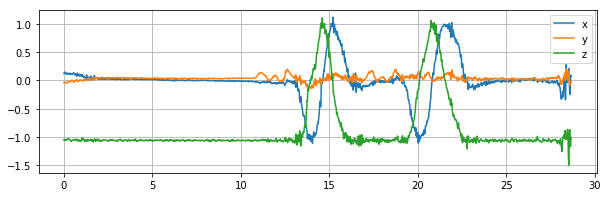

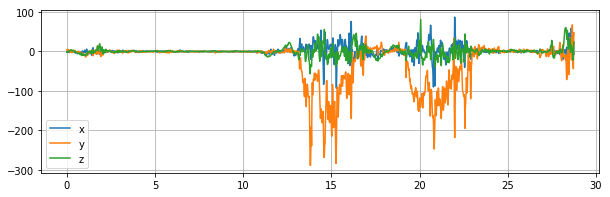

In [8]:
# View plot of data
figsize = (10, 3)


def plot(df, x, y, ax=None):
    """
    Plots the x and y selected from df
    
    Param:
        df: pd.DataFrame()
        x: str/int
        y: str[]/int[]
    """
    # Ensure y is iterable
    if type(y) != type([]):
        y = [y]
    
    if not ax:
        fig, ax = plt.subplots(1, figsize=figsize)
        
    for i in y:
        ax.plot(df[x], df[i])

    ax.legend()
    ax.grid()
    
    plt.show()
    
for v in d.values():
    plot(v['df'], 'elapsed', ['x', 'y', 'z'])

In [9]:
# Not all data will match each other
# We want to ensure the data of accel and gyro match each other
# There is no exact 1-to-1 match
# Instead, we get the closest match


def match_df_shape(dfa, dfg):
    """
    Matches the number of rows of accel dataframe to gyro dataframe
    Allows for 1 extra value in gyroscope dataframe
    Extra row required to eliminate NaN row when calculating elapsed time difference
    
    Param:
        dfa, dfg: pd.DataFrame()
    
    Return:
        dfa, dfg: pd.DataFrame()
    """
    assert type(dfa) == type(pd.DataFrame())
    assert type(dfg) == type(pd.DataFrame())

    # If accel is one less than gyro, return
    if dfa.shape[0] == dfg.shape[0] - 1:
        return dfa, dfg
    else:
        # Ensure accel is at LEAST less than gyro, even if not by one
        assert dfa.shape[0] < dfg.shape[0], 'Unimplemented'
        
        # If so, we assume that the first index of accel is less than the first index of gyro for 'datetime'
        assert dfa['datetime'][0] > dfg['datetime'][0], 'Unimplemented'
        
        if dfa['datetime'][0] > dfg['datetime'][0]:
            diff = dfg['datetime'].apply(lambda x: abs(x - dfa['datetime'][0]))
            
            diff = diff[diff == diff.min()].index
            
            # Ensure only one index containing the closest match between accel and gyro
            assert len(diff) == 1
            
            diff = diff[0] - 1
            
            assert diff > 0
            
            dfg = dfg.loc[diff:, :].reset_index(drop=True)
            
            # Ensure accel and gyro are now differed by one
            assert dfa.shape[0] == dfg.shape[0] - 1
            
            if dfa.shape[0] == dfg.shape[0] - 1:
                return dfa, dfg
        
        
        
#         if df_small[col][0] > df_big[col][0]:
#             diff = df_big[col].apply(lambda x: abs(x - df_small[col][0]))

#             diff_index = diff[diff == diff.min()].index

#             assert len(diff_index) == 1

#             df_big = df_big.loc[diff_index[0]:, :].reset_index(drop=True)

#         assert dfa.shape[0] == dfg.shape[0] - 1, 'Unimplemented'


#     else:
#         # Assert that the first value of small is bigger than the first value of bigger in the 'datetime' column
#         assert df_small['datetime'][0] > df_big['datetime'][0], "Unimplemented"

#         if df_small[col][0] > df_big[col][0]:
#             diff = df_big[col].apply(lambda x: abs(x - df_small[col][0]))

#             diff_index = diff[diff == diff.min()].index

#             assert len(diff_index) == 1

#             df_big = df_big.loc[diff_index[0]:, :].reset_index(drop=True)


def match_df_shape_X(df1, df2, col, allowed=1):
    """
    
    
    Matches the rows of df1 and df2 to minimise the difference in col
    
    Param:
        df1, df2: pd.DataFrame()
        col: int/str
        allowed: int: allowed difference in size between smaller and larger dataframes
    """
    assert type(df1) == type(pd.DataFrame())
    assert type(df2) == type(pd.DataFrame())

    for df in [df1, df2]:
        try:
            df[col]
        except Exception as e:
            raise e

    if abs(df1.shape[0] - df2.shape[0]) == allowed:
        return df1, df2

    else:
        df_small = df1
        df_big = df2
        invert = False

        if df1.shape[0] > df2.shape[0]:
            invert = True
            df_small = df2
            df_big = df1

        assert df_small[col][0] > df_big[col][0], "Unimplemented"

        if df_small[col][0] > df_big[col][0]:
            diff = df_big[col].apply(lambda x: abs(x - df_small[col][0]))

            diff_index = diff[diff == diff.min()].index

            assert len(diff_index) == 1

            df_big = df_big.loc[diff_index[0]:, :].reset_index(drop=True)

        assert df_small.shape == df_big.shape, 'Unimplemented'

        if not invert:
            return df_small, df_big
        else:
            return df_big, df_small


for i in ['a', 'g']:
    d[i]['df']['datetime'] = d[i]['df']['time'].apply(
        lambda x: dt.strptime(x, '%Y-%m-%dT%H:%M:%S.%f'))

d['a']['df'], d['g']['df'] = match_df_shape(d['a']['df'], d['g']['df'])

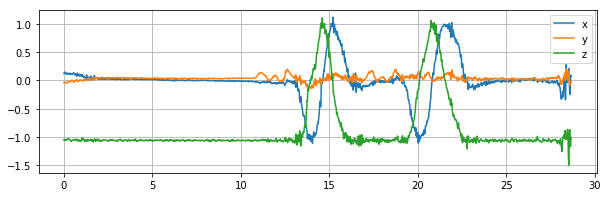

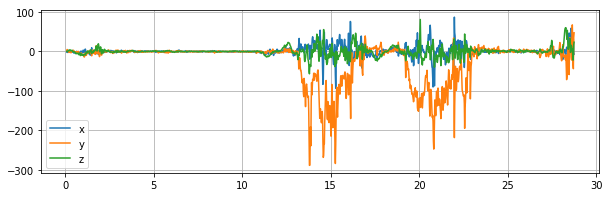

In [10]:
# Ensure data visualisation is still the same, i.e. no mistakes in trimming
for v in d.values():
    plot(v['df'], 'elapsed', ['x', 'y', 'z'])

In [11]:
# Get elapsed difference
d['g']['df']['elapsed_diff'] = d['g']['df']['elapsed'].diff()

# Pop first value
d['g']['df'] = d['g']['df'].loc[1:, :].reset_index(drop=True)

# Get degrees of rotation based on deg/s (x, y, z) multiplied by elapsed time
# Give the answer in radians
for i in ['x', 'y', 'z']:
    d['g']['df']['abs_' + i] = d['g']['df'].apply(lambda x: math.radians(x['elapsed_diff'] * x[i] * -1), axis=1)
#     d['g']['df']['abs_' + i] = d['g']['df'].apply(lambda x: math.radians(x[i]), axis=1)
    
# Get rotation object
d['g']['df']['R'] = d['g']['df'].apply(lambda x: R.from_rotvec([x['abs_' + i] for i in ['x', 'y', 'z']]),axis=1)

In [12]:
d['g']['df']

,epoch,time,elapsed,x,y,z,datetime,elapsed_diff,abs_x,abs_y,abs_z,R
0,1580428369342,2020-01-30T23:52:49.342,0.101,-1.098,4.390,-0.427,2020-01-30 23:52:49.342,0.020,0.000383,-0.001532,0.000149,(((<scipy.spatial.transform.rotation.Rotation ...
1,1580428369363,2020-01-30T23:52:49.363,0.122,-2.409,1.707,-0.991,2020-01-30 23:52:49.363,0.021,0.000883,-0.000626,0.000363,(((<scipy.spatial.transform.rotation.Rotation ...
2,1580428369382,2020-01-30T23:52:49.382,0.141,-3.262,0.168,0.518,2020-01-30 23:52:49.382,0.019,0.001082,-0.000056,-0.000172,(((<scipy.spatial.transform.rotation.Rotation ...
3,1580428369402,2020-01-30T23:52:49.402,0.161,-1.311,0.381,0.960,2020-01-30 23:52:49.402,0.020,0.000458,-0.000133,-0.000335,(((<scipy.spatial.transform.rotation.Rotation ...
4,1580428369423,2020-01-30T23:52:49.423,0.182,-0.869,-2.622,1.402,2020-01-30 23:52:49.423,0.021,0.000319,0.000961,-0.000514,(((<scipy.spatial.transform.rotation.Rotation ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1580428397918,2020-01-30T23:53:17.918,28.677,18.018,35.854,-6.098,2020-01-30 23:53:17.918,0.020,-0.006289,-0.012515,0.002129,(((<scipy.spatial.transform.rotation.Rotation ...
1424,1580428397939,2020-01-30T23:53:17.939,28.698,36.082,-31.601,-22.454,2020-01-30 23:53:17.939,0.021,-0.013225,0.011582,0.008230,(((<scipy.spatial.transform.rotation.Rotation ...
1425,1580428397958,2020-01-30T23:53:17.958,28.717,29.375,-44.177,-10.686,2020-01-30 23:53:17.958,0.019,-0.009741,0.014650,0.003544,(((<scipy.spatial.transform.rotation.Rotation ...
1426,1580428397978,2020-01-30T23:53:17.978,28.737,-2.256,34.954,16.738,2020-01-30 23:53:17.978,0.020,0.000787,-0.012201,-0.005843,(((<scipy.spatial.transform.rotation.Rotation ...


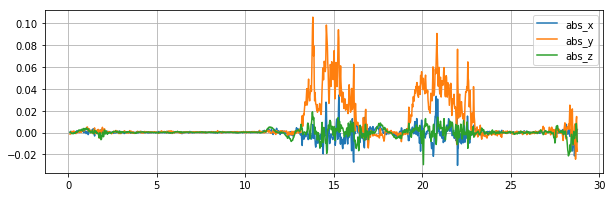

In [13]:
# Plot absolute rotation
plot(d['g']['df'], 'elapsed', ['abs_' + i for i in ['x', 'y', 'z']])

In [14]:
# Apply rotation
# Extract xyz
xyz = d['a']['df'].apply(lambda x: [x[i] for i in ['x', 'y', 'z']], axis=1).to_list()

for i in tqdm(range(d['a']['df'].shape[0])):
    rotator = d['g']['df'].loc[i, 'R']
    
    for j in range(i, d['a']['df'].shape[0]):        
        xyz[j] = rotator.apply(xyz[j], inverse=True)
        
#         print(i, j)
    
#     xyz.append(d['g']['df'].loc[i,
#                                 'R'].apply(d['a']['df'].loc[i,
#                                                             ['x', 'y', 'z']].to_list(), inverse=True))

#     xyz.append(d['a']['df'].loc[i, ['x', 'y', 'z']].to_list())
#     xyz[-1] = d['g']['df'].loc[i, 'R'].apply(xyz[-1], inverse=True)

xyz = pd.DataFrame(xyz, columns=['x', 'y', 'z'])

for i in ['x', 'y', 'z']:
    d['a']['df']['actual_' + i] = xyz[i]

In [15]:
d['a']['df']

,epoch,time,elapsed,x,y,z,datetime,actual_x,actual_y,actual_z
0,1580428369342,2020-01-30T23:52:49.342,0.000,0.122,-0.038,-1.051,2020-01-30 23:52:49.342,0.120384,-0.038421,-1.051171
1,1580428369363,2020-01-30T23:52:49.363,0.021,0.135,-0.047,-1.065,2020-01-30 23:52:49.363,0.132677,-0.048417,-1.065228
2,1580428369382,2020-01-30T23:52:49.382,0.040,0.133,-0.044,-1.057,2020-01-30 23:52:49.382,0.130645,-0.046527,-1.057185
3,1580428369402,2020-01-30T23:52:49.402,0.060,0.138,-0.045,-1.058,2020-01-30 23:52:49.402,0.135517,-0.047970,-1.058190
4,1580428369423,2020-01-30T23:52:49.423,0.081,0.146,-0.046,-1.045,2020-01-30 23:52:49.423,0.144578,-0.049192,-1.045052
...,...,...,...,...,...,...,...,...,...,...
1423,1580428397918,2020-01-30T23:53:17.918,28.576,-0.251,-0.080,-0.875,2020-01-30 23:53:17.918,0.014145,0.107910,-0.907293
1424,1580428397939,2020-01-30T23:53:17.939,28.597,-0.181,-0.085,-1.074,2020-01-30 23:53:17.939,0.149586,0.169929,-1.068742
1425,1580428397958,2020-01-30T23:53:17.958,28.616,0.061,-0.024,-1.175,2020-01-30 23:53:17.958,0.414762,0.282331,-1.064511
1426,1580428397978,2020-01-30T23:53:17.978,28.636,0.090,-0.026,-1.056,2020-01-30 23:53:17.978,0.393495,0.253661,-0.951173


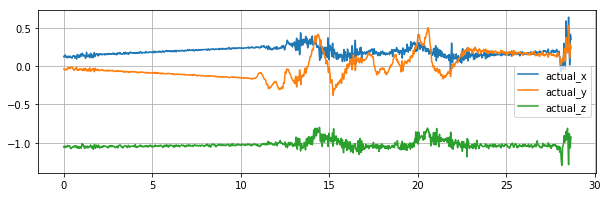

In [16]:
plot(d['a']['df'], 'elapsed', ['actual_' + i for i in ['x', 'y', 'z']])

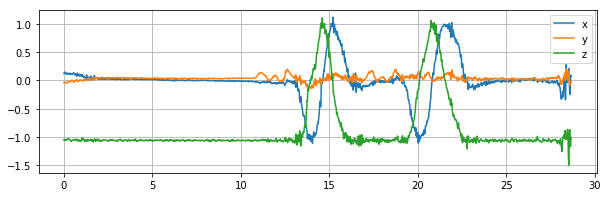

In [17]:
plot(d['a']['df'], 'elapsed', [i for i in ['x', 'y', 'z']])

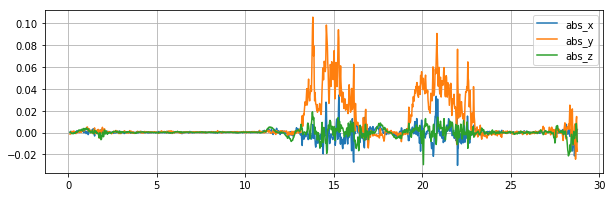

In [18]:
# Plot absolute rotation
plot(d['g']['df'], 'elapsed', ['abs_' + i for i in ['x', 'y', 'z']])

In [19]:
d['a']['df'].loc[:, 'actual_z'] = d['a']['df'].loc[:, 'actual_z'].apply(lambda x: x + 1)

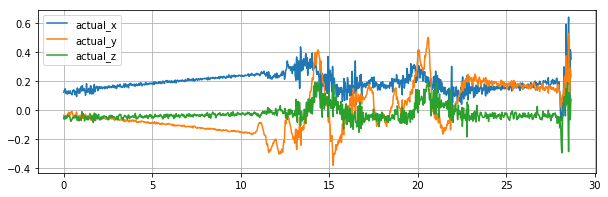

In [20]:
plot(d['a']['df'], 'elapsed', ['actual_' + i for i in ['x', 'y', 'z']])